In [23]:
from one_bernoulli import OneBernoulliTesting
from two_bernoulli import TwoBernoulliTesting
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def gen_sample(n, p):
    return sps.bernoulli(p).rvs(n)

def get_hyp_prob_and_baeys(X, params):
    model = OneBernoulliTesting()
    model.fit(X)
    return model.aposterior_prob(*params)[0], model.bayes_factor(*params)

ps = np.arange(0.4, 0.8, 0.01)
n = 100
p = 0.5
sample = gen_sample(n, p)
    

### Проверка гипотезы типа Простая vs. Простая для выборки из распределение $Bern(p)$

$H_0: p = \theta_0$ vs $H_1: p = \theta_1$

* $\pi_0$ - априорная вероятность $H_0$
* $\pi_1$ - априорная вероятность $H_1$

Тогда $p(x) = \pi_0 \theta_0^{\Sigma x} (1 - \theta_0)^{n - \Sigma x} + \pi_1 \theta_1^{\Sigma x} (1 - \theta_1)^{n - \Sigma x}$ -  вероятность выборки

* $p_0 = \frac {\pi_0 \theta_0^{\Sigma X} (1 - \theta_0)^{n - \Sigma X}}{p(X)}$ - апростериорная вероятность $H_0$
* $p_1 = \frac {\pi_1 \theta_1^{\Sigma X} (1 - \theta_1)^{n - \Sigma X}}{p(X)}$ - апростериорная вероятность $H_1$

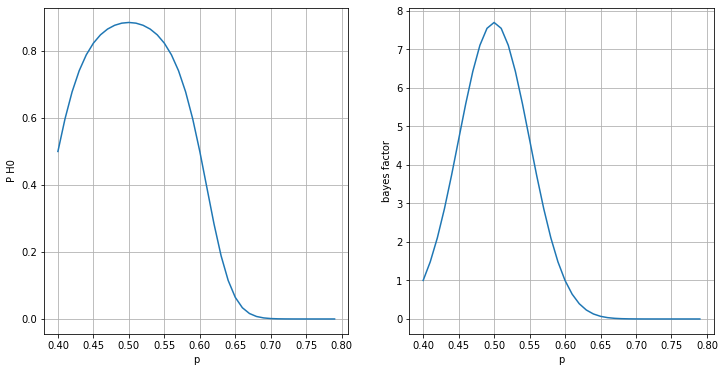

In [62]:
hypothesis = 'simple vs simple'
alternative = 'less'
aprior='Bernoulli'
params =  [0.5, hypothesis, alternative, aprior]

res = np.array([get_hyp_prob_and_baeys(sample, [[p, 0.6]] +params) for p in ps])


plt.figure(figsize=(12, 6))
plt.subplot('121')
plt.plot(ps, res[:, 0])
plt.xlabel('p')
plt.ylabel("P H0")
plt.grid(True)
plt.subplot('122')
plt.plot(ps, res[:, 1])
plt.xlabel('p')
plt.ylabel("bayes factor")
plt.grid(True)
plt.show()

### Проверка гипотезы типа Сложная vs. Сложная для выборки из распределение $Bern(p)$

$H_0: \theta > \theta_0$ vs $H_1: \theta \leq \theta_0$

$\theta$ ~ $Beta(\alpha, \beta)$ - апрриорное распределение

$\theta$ ~ $Beta(\alpha+\Sigma X, \beta+n-\Sigma X)$ - апостериорное распределение 


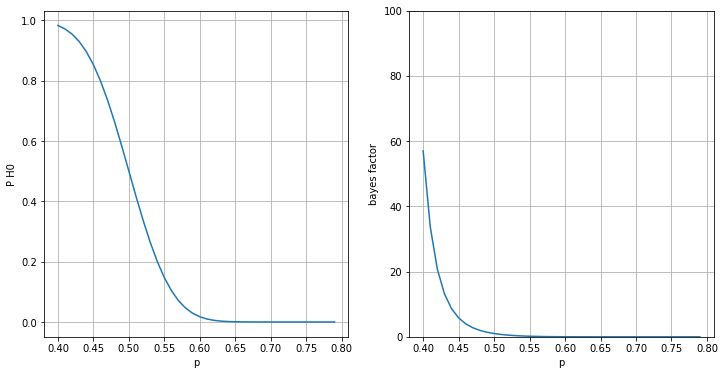

In [60]:
hypothesis = 'complex vs complex'
alternative = 'less'
aprior='Beta'
params =  [[5, 5], hypothesis, alternative, aprior]

res = np.array([get_hyp_prob_and_baeys(sample, [p]+params) for p in ps])

plt.figure(figsize=(12, 6))
plt.subplot('121')
plt.plot(ps, res[:, 0])
plt.xlabel('p')
plt.ylabel("P H0")
plt.grid(True)
plt.subplot('122')
plt.ylim(0, 100)
plt.plot(ps, res[:, 1])
plt.xlabel('p')
plt.ylabel("bayes factor")
plt.grid(True)
plt.show()

### Проверка гипотезы типа Простая vs. Сложная для выборки из распределение $Bern(p)$


#### Априор с атомом

$H_0: \theta = \theta_0$ vs $H_1: \theta \neq \theta_1$

* $\pi_0$ - априорная вероятность $H_0$
* $\pi_1$ - априорная вероятность $H_1$
* $q(t)$  - априорная плотность на $H_1$, $\int_{\Theta_1}q(t)dt = 1$

Тогда $p(x) = \pi_0  p_{t_0}(x) + \pi_1\int_{\Theta_1}p_{t}(x)q(t)dt$ - плотность выборки,


$\frac{\pi_1\int_{\Theta_1}p_{t}(x)q(t)dt}{p(x)}$ - апостериорная вероятность $H_1$


$\frac{\pi_0  p_{t_0}(x)}{p(x)}$ - апостериорная вероятность $H_0$


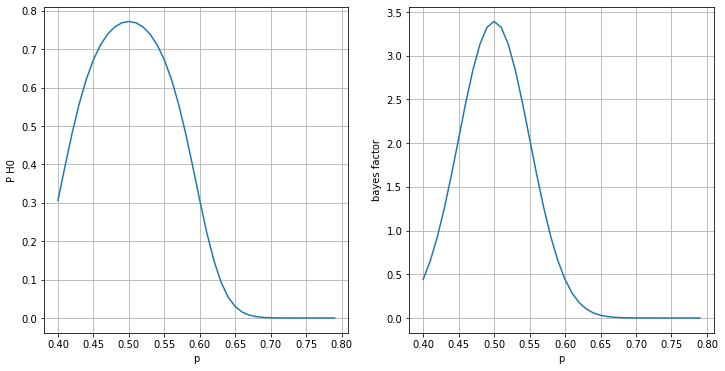

In [35]:
hypothesis = 'aprior with atom'
alternative = 'two-sided'
aprior='Beta'
params =  [[5, 5, 0.5], hypothesis, alternative, aprior]

res = np.array([get_hyp_prob_and_baeys(sample, [p] +params) for p in ps])


plt.figure(figsize=(12, 6))
plt.subplot('121')
plt.plot(ps, res[:, 0])
plt.xlabel('p')
plt.ylabel("P H0")
plt.grid(True)
plt.subplot('122')
plt.plot(ps, res[:, 1])
plt.xlabel('p')
plt.ylabel("bayes factor")
plt.grid(True)
plt.show()

#### Модификация нулевой гипотезы

$H_0: p = \theta_0$ vs $H_1: p < \theta_0$

Вместо простой гипотезы рассмотрим сложную: $H_0: p \in [\theta_0, \theta_0+\epsilon]$

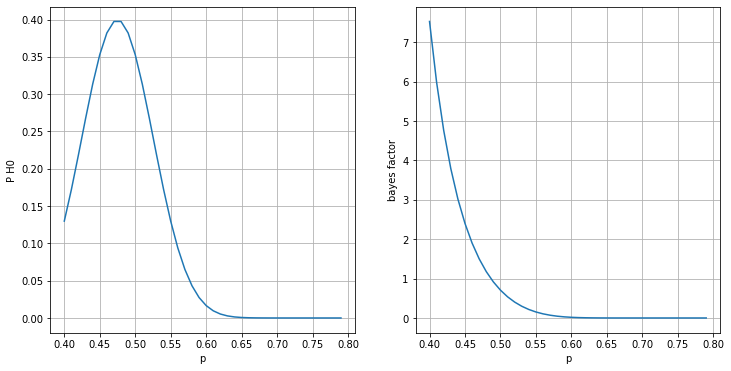

In [34]:
hypothesis = 'H_0 modification'
alternative = 'less'
aprior='Beta'
params =  [[5, 5, 0.05], hypothesis, alternative, aprior]

res = np.array([get_hyp_prob_and_baeys(sample, [p] +params) for p in ps])


plt.figure(figsize=(12, 6))
plt.subplot('121')
plt.plot(ps, res[:, 0])
plt.xlabel('p')
plt.ylabel("P H0")
plt.grid(True)
plt.subplot('122')
plt.plot(ps, res[:, 1])
plt.xlabel('p')
plt.ylabel("bayes factor")
plt.grid(True)
plt.show()

#### Метод Линди 

$H_0: p = \theta_0$ vs $H_1: p < \theta_0$

In [7]:

model = OneBernoulliTesting()
model.fit(sample)
    
#res = np.array([model.lindi_method(p, [5, 5]) for p in ps])

#plt.fill_between(ps, res[:, 0], res[:, 1])

### Сравнение независимых выборок

$H_0 \theta_0 = \theta_1$ vs $H_1 \theta_0 \neq \theta_1$

Оценим величину $\Lambda = log\frac \theta {1-\theta}$

Если $\theta$ ~ $Beta(\alpha', \beta')$ - апрриорное распределение, $\theta$ ~ $Beta((\alpha'+\Sigma X) = \alpha, (\beta'+n-\Sigma X) =\beta )$ - апостериорное распределение на $ \theta $, то $\Lambda|X$ ~ $N(log(\frac{\alpha - 0.5}{\beta- 0.5}), \frac 1 \alpha + \frac 1 \beta)$

Тогда  $\Lambda_0 - \Lambda_1|X$ ~ $N(log(\frac{(\alpha_0 - 0.5)(\beta_1 - 0.5)}{(\beta_0 - 0.5)(\alpha_1 - 0.5)}), \frac 1 \alpha_0 + \frac 1 \beta_0 + \frac 1 \alpha_1 + \frac 1 \beta_1)$

In [57]:
def gen_samples(n, p1, p2):
    return sps.bernoulli(p1).rvs(n), sps.bernoulli(p2).rvs(n)

def get_dispersive_analysis_result(X, Y, params):
    model = TwoBernoulliTesting()
    model.fit(X, Y)
    return model.dispersive_analysis(params)

def draw(params):
    diff_lim = 0.2
    step = 0.01
    p0 = 0.5
    diffs = np.arange(-diff_lim, diff_lim, step)
    res = np.zeros((len(diffs), 2))
    for i in range(30):
        res += np.array([get_dispersive_analysis_result(*gen_samples(100, p0, p0+d), params)['HDR'] for d in diffs])
    res = res/30
    plt.figure(figsize=(12, 6))
    plt.fill_between(diffs, res[:, 0], res[:, 1])
    plt.xlabel('true difference')
    plt.ylabel("Lambda0 - Lambda1 estim")
    plt.grid(True)
    plt.show()

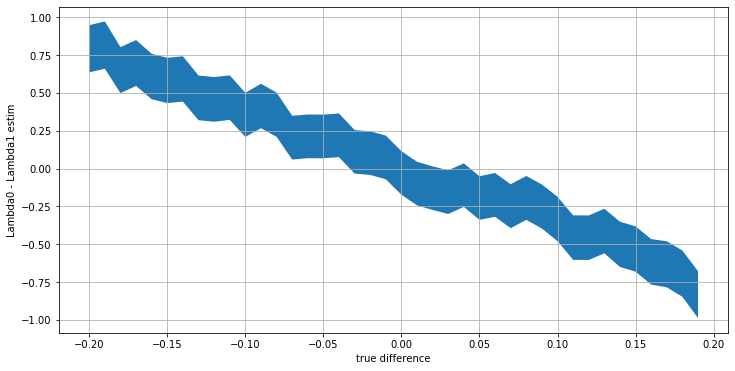

In [58]:
params = [5, 5, 5, 5]
draw(params)